# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Revisión de ceros en la glucose, dado que representan menos del 1% del DF (5 valores, los eliminaré)
conteo_ceros = (df['Glucose'] == 0).sum()
print("Número de ceros:", conteo_ceros)


Número de ceros: 5


In [28]:
df = df[df['Glucose'] != 0]
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
conteo_ceros = (df['BloodPressure'] == 0).sum()
print("Número de ceros:", conteo_ceros)

Número de ceros: 35


In [32]:
#Imputaré los 35 ceros con la mediana ya que la distribución tiende a ser regular y no es muy afectada por valores atípicos.

mediana_presion = df['BloodPressure'].replace(0, np.nan).median()
df['BloodPressure'] = df['BloodPressure'].replace(0, mediana_presion)
df.describe()


/tmp/ipykernel_7015/1353045631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BloodPressure'] = df['BloodPressure'].replace(0, mediana_presion)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
conteo_ceros = (df['BMI'] == 0).sum()
print("Número de ceros:", conteo_ceros)

Número de ceros: 11


In [38]:
mediana_bmi = df['BMI'].replace(0, np.nan).median()
df['BMI'] = df['BMI'].replace(0, mediana_bmi)
df.describe()

/tmp/ipykernel_7015/3311764931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['BMI'].replace(0, mediana_bmi)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,20.477064,80.292267,32.452425,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,15.973171,115.457448,6.878757,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
conteo_ceros = (df['SkinThickness'] == 0).sum()
print("Número de ceros:", conteo_ceros)

Número de ceros: 227


/tmp/ipykernel_7015/116726830.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Pregnancies.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_7015/116726830.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Glucose.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
/tmp/ipykernel_7015/116726830.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Insulin.set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
/tmp/ipykernel_7015/116726830.py:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_age.set_xticklabels(axis[2,1].get_xticklabels(), rotation=90)


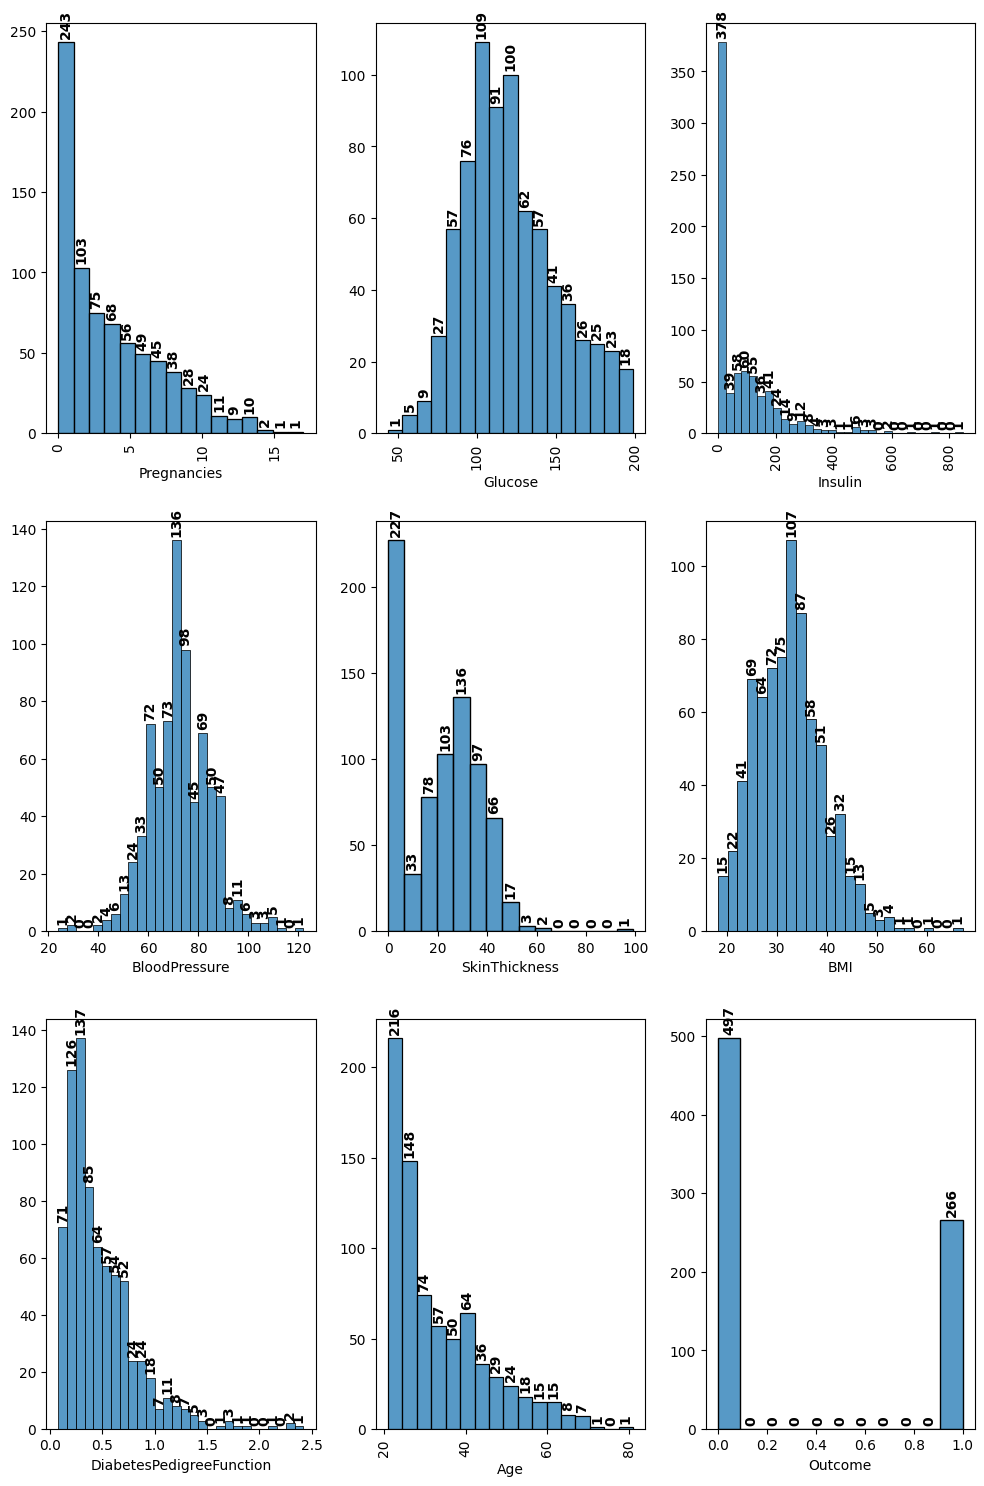

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (10, 15))

Gráfico_Pregnancies = sns.histplot(ax=axis[0,0],data=df, x='Pregnancies')
Gráfico_Pregnancies.set_ylabel('')
Gráfico_Pregnancies.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
for p in Gráfico_Pregnancies.patches:
    Gráfico_Pregnancies.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_Glucose= sns.histplot(ax=axis[0,1],data=df, x='Glucose')
Gráfico_Glucose.set_ylabel('')
Gráfico_Glucose.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
for p in Gráfico_Glucose.patches:
    Gráfico_Glucose.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_Insulin= sns.histplot(ax=axis[0,2],data=df, x='Insulin')
Gráfico_Insulin.set_ylabel('')
Gráfico_Insulin.set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
for p in Gráfico_Insulin.patches:
    Gráfico_Insulin.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_BloodPressure=sns.histplot(ax=axis[1,0],data=df, x='BloodPressure')
Gráfico_BloodPressure.set_ylabel('')
for p in Gráfico_BloodPressure.patches:
    Gráfico_BloodPressure.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_SkinThickness=sns.histplot(ax=axis[1,1],data=df, x='SkinThickness')
Gráfico_SkinThickness.set_ylabel('')
for p in Gráfico_SkinThickness.patches:
    Gráfico_SkinThickness.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_BMI=sns.histplot(ax=axis[1,2],data=df, x='BMI')
Gráfico_BMI.set_ylabel('')
for p in Gráfico_BMI.patches:
    Gráfico_BMI.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_DiabetesPedigreeFunction=sns.histplot(ax=axis[2,0],data=df, x='DiabetesPedigreeFunction')
Gráfico_DiabetesPedigreeFunction.set_ylabel('')
for p in Gráfico_DiabetesPedigreeFunction.patches:
    Gráfico_DiabetesPedigreeFunction.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_age=sns.histplot(ax=axis[2,1],data=df, x='Age')
Gráfico_age.set_ylabel('')
Gráfico_age.set_xticklabels(axis[2,1].get_xticklabels(), rotation=90)
for p in Gráfico_age.patches:
    Gráfico_age.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_Outcome=sns.histplot(ax=axis[2,2],data=df, x='Outcome')
Gráfico_Outcome.set_ylabel('')
for p in Gráfico_Outcome.patches:
    Gráfico_Outcome.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

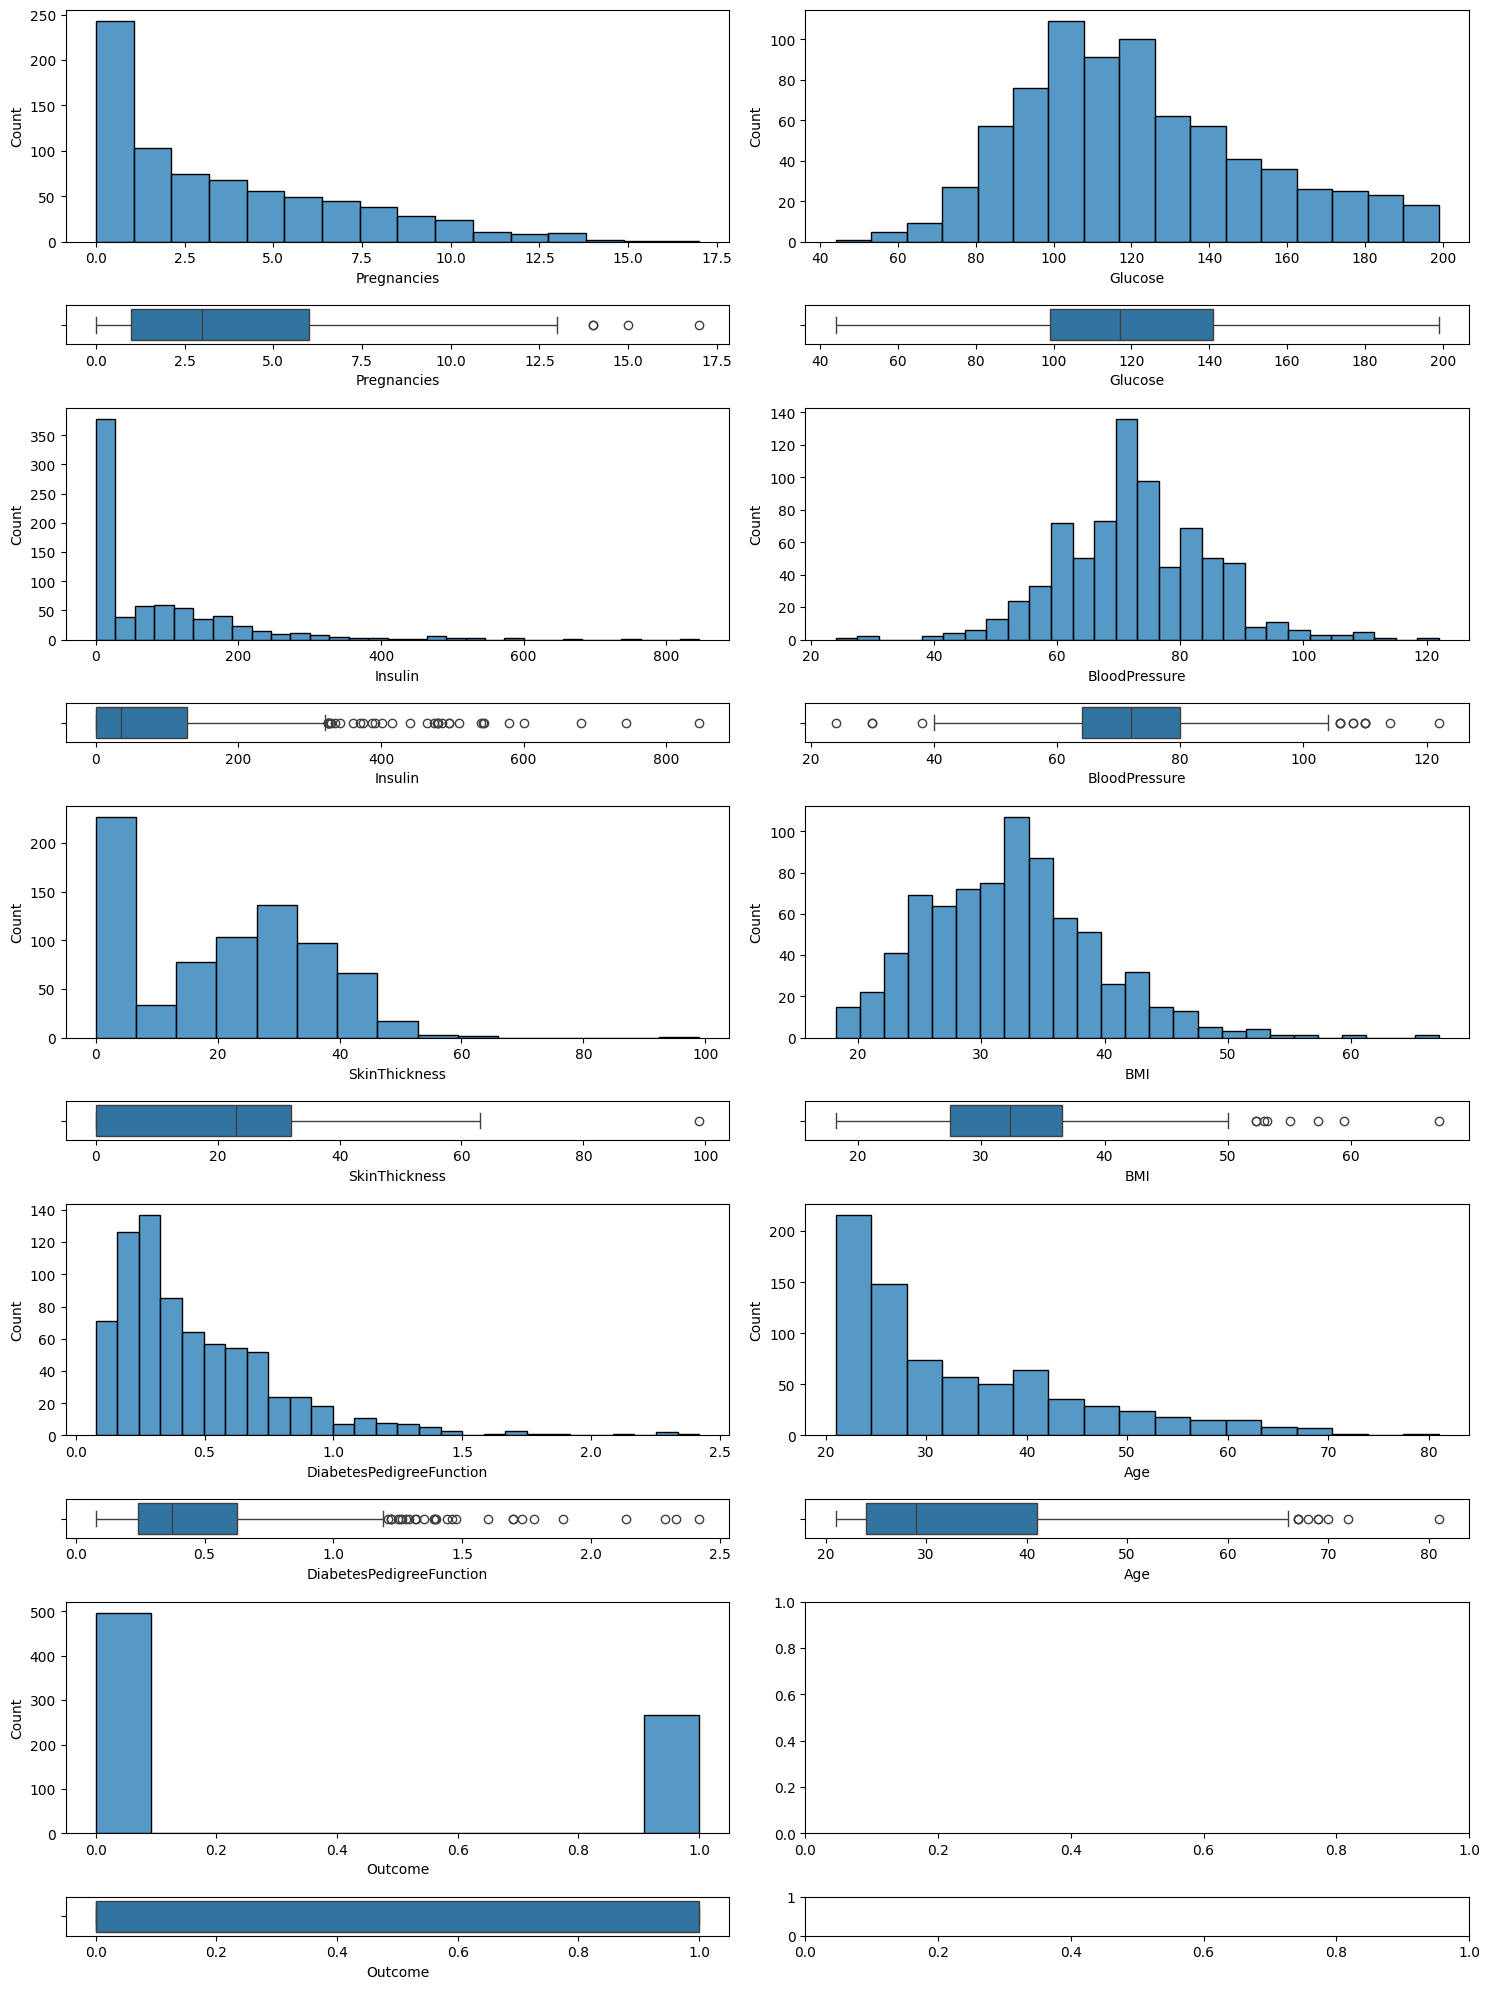

In [44]:
fig, axis = plt.subplots(10, 2, figsize = (15, 20), gridspec_kw={'height_ratios': [6, 1,6,1,6, 1,6,1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='Pregnancies')
sns.boxplot(ax=axis[1,0],data=df,x='Pregnancies')

sns.histplot(ax=axis[0,1],data=df,x='Glucose')
sns.boxplot(ax=axis[1,1],data=df,x='Glucose')

sns.histplot(ax=axis[2,0],data=df,x='Insulin')
sns.boxplot(ax=axis[3,0],data=df,x='Insulin')

sns.histplot(ax=axis[2,1],data=df,x='BloodPressure')
sns.boxplot(ax=axis[3,1],data=df,x='BloodPressure')

sns.histplot(ax=axis[4,0],data=df,x='SkinThickness')
sns.boxplot(ax=axis[5,0],data=df,x='SkinThickness')

sns.histplot(ax=axis[4,1],data=df,x='BMI')
sns.boxplot(ax=axis[5,1],data=df,x='BMI')

sns.histplot(ax=axis[6,0],data=df,x='DiabetesPedigreeFunction')
sns.boxplot(ax=axis[7,0],data=df,x='DiabetesPedigreeFunction')

sns.histplot(ax=axis[6,1],data=df,x='Age')
sns.boxplot(ax=axis[7,1],data=df,x='Age')

sns.histplot(ax=axis[8,0],data=df,x='Outcome')
sns.boxplot(ax=axis[9,0],data=df,x='Outcome')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

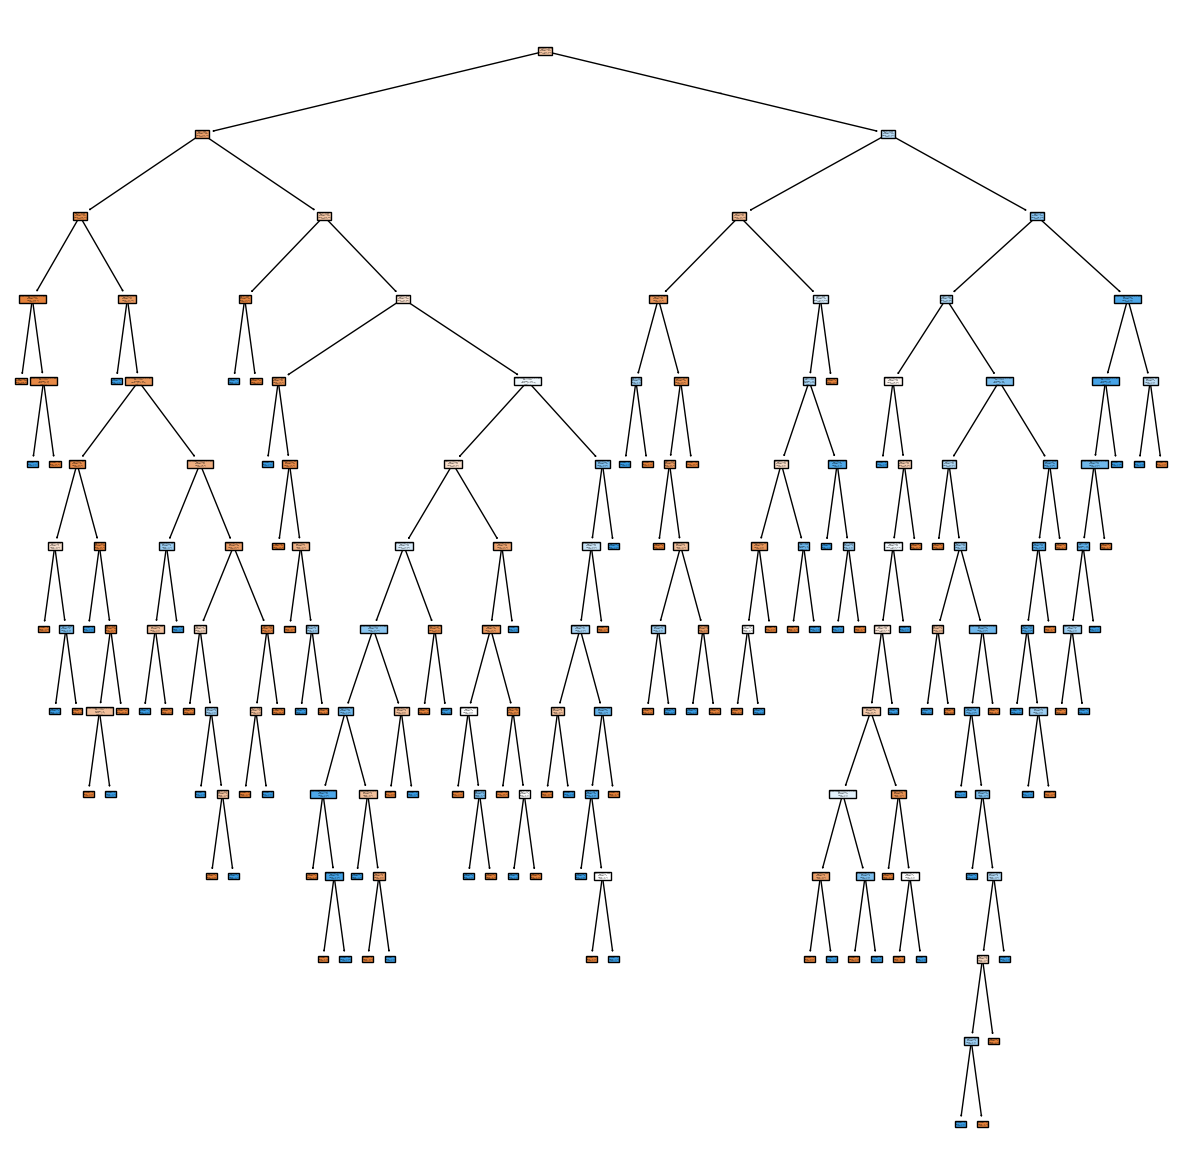

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7467532467532467

In [ ]:
model1 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model2 = DecisionTreeClassifier(random_state=42,criterion='log_loss')

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

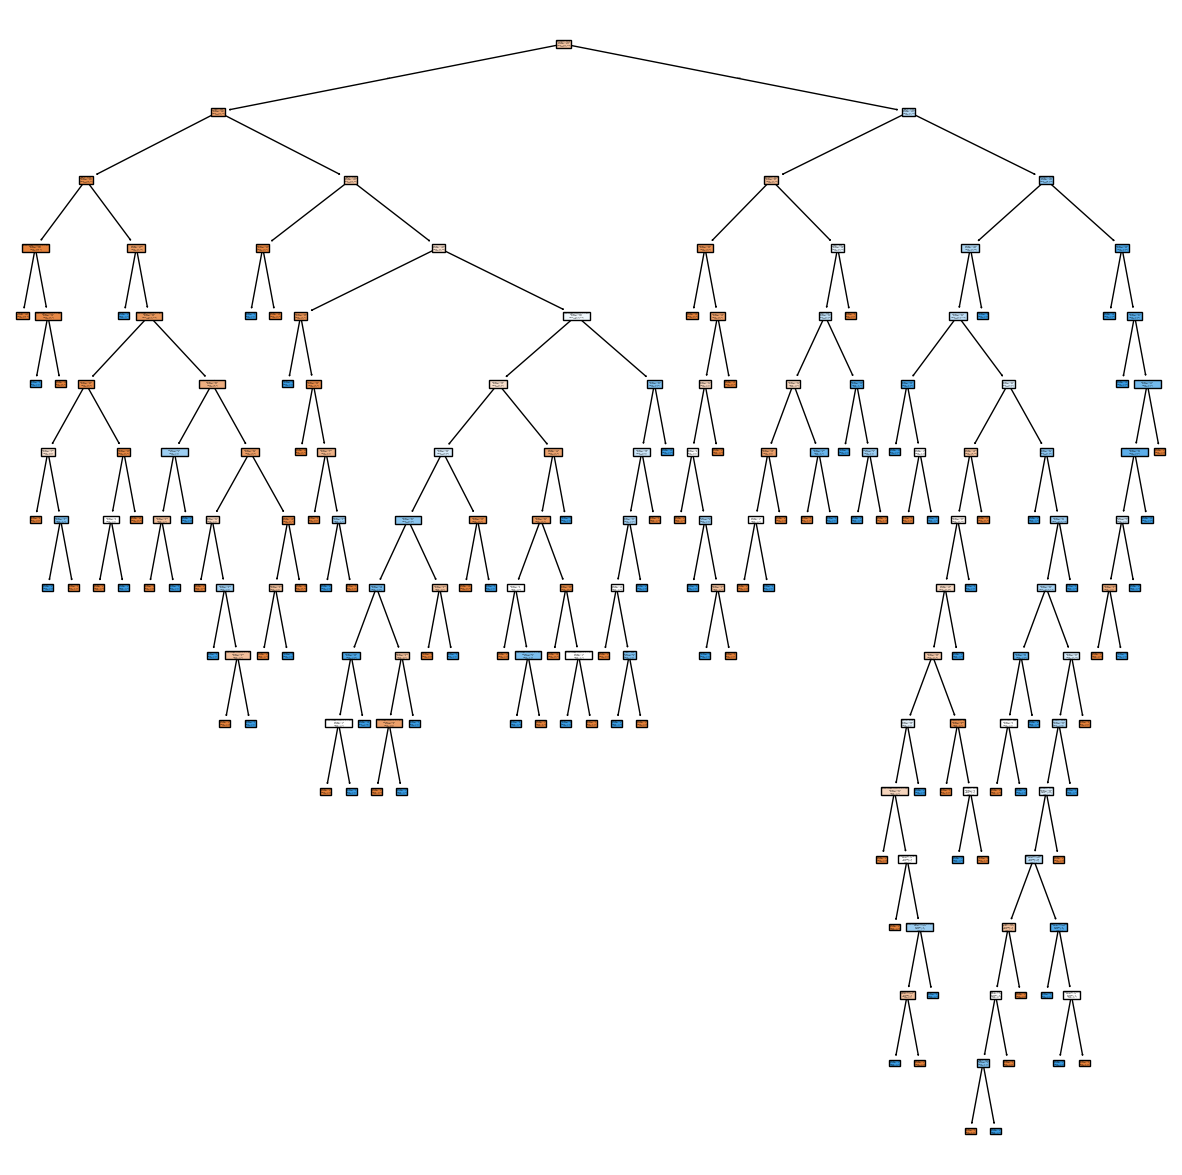

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model1, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

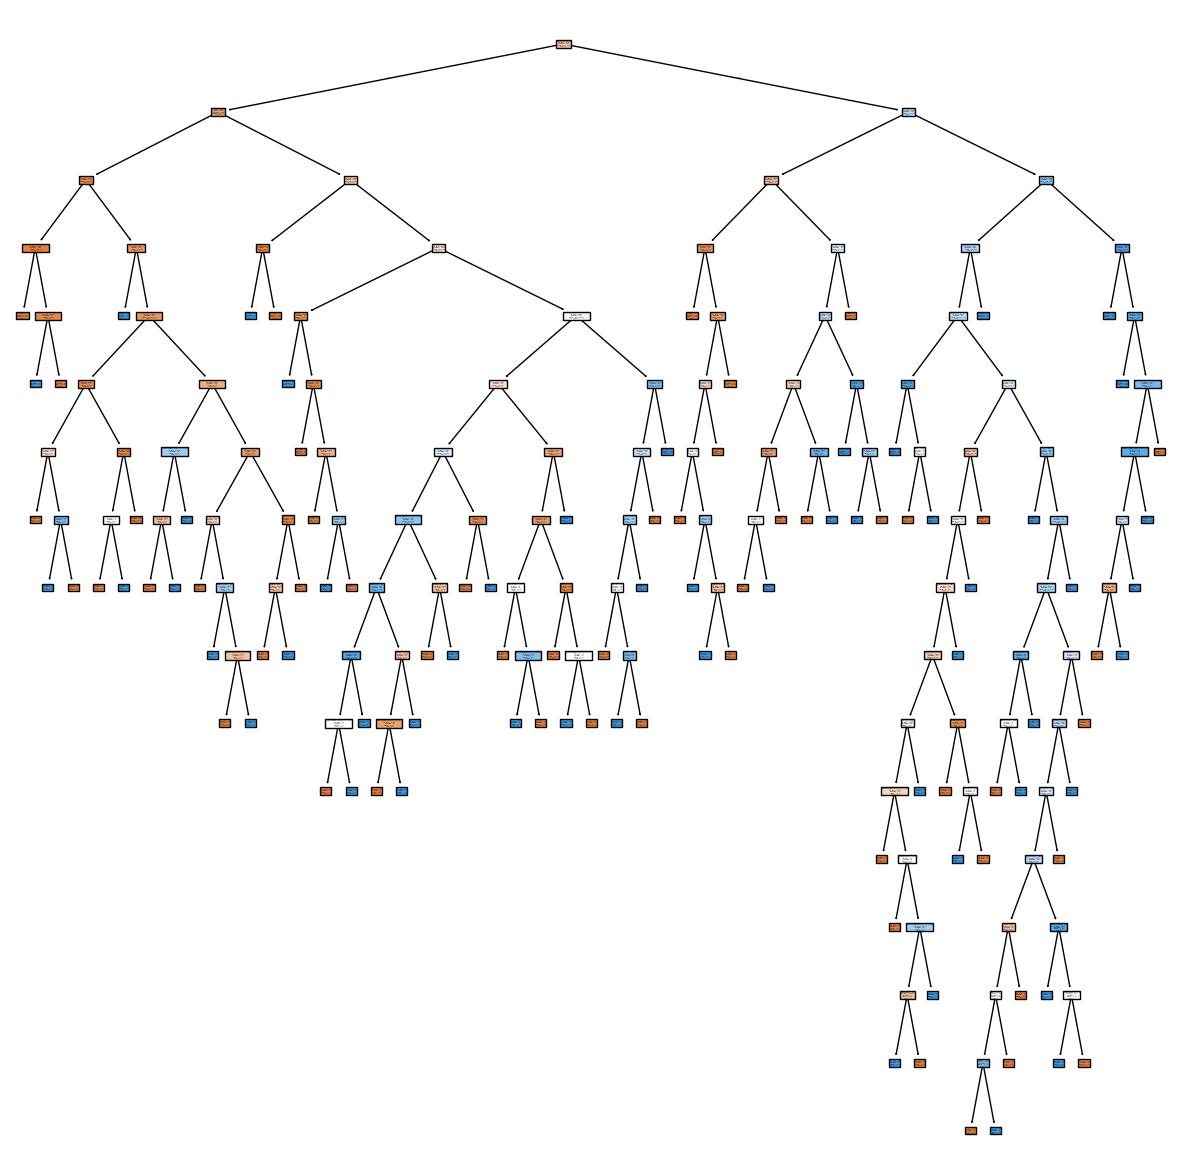

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model2, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [ ]:
y_pred_entropy = model1.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy))
y_pred_log_loss = model2.predict(X_test)
print(accuracy_score(y_test,y_pred_log_loss))


0.7207792207792207
0.7207792207792207


In [ ]:

grid = {
    'criterion' : ['gini','log_loss','entropy'],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,4,6,8],
    'max_features' : ['auto','sqrt','log2',2,3,4,5]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model,grid,scoring='accuracy')
clf.fit(X_train,y_train)

best_model = clf.best_estimator_

print(clf.best_params_)
print(clf.best_score_)


{'criterion': 'log_loss', 'max_features': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.760575769692123


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [ ]:
best_model.feature_importances_

array([0.02485285, 0.36527906, 0.03689803, 0.05073512, 0.05766581,
       0.21157951, 0.06485356, 0.18813606])

In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
from pickle import dump
dump(best_model,open('../models/decission_tree_clasiffier_42_log_loss_max_features_5_min_samples_leaf_8_min_samples_split_2.model','wb'))